In [1]:
import pandas as pd

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None)

In [8]:
from itertools import combinations

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_csv("../files/merchant_fill_nonulls.csv", index_col = 0)
df.head(2)

title  price  retail_price  \
0  2020 Summer Vintage Flamingo Print  Pajamas Se...   16.0            14   
1  SSHOUSE Summer Casual Sleeveless Soirée Party ...    8.0            22   

   units_sold uses_ad_boosts  rating_sold  rating_count badge_local_product  \
0         100             No         3.76            54                  No   
1       20000             Si         3.45          6135                  No   

  badge_product_quality badge_fast_shipping  \
0                 Buena                  No   
1                 Buena                  No   

                                                tags product_color  \
0  Summer,Fashion,womenunderwearsuit,printedpajam...         white   
1  Mini,womens dresses,Summer,Patchwork,fashion d...         green   

  product_variation_size_id shipping_option_name  shipping_option_price  \
0                         M   Livraison standard                      4   
1                        XS   Livraison standard                      2   

  shipping_is_express  countries_shipped_to  inventory_total origin_country  \
0                  No                    34               50             CN   
1                  No                    41               50             CN   

  merchant_name merchant_info_subtitle  merchant_rating_count  \
0      zgrdejia                Unknown                    568   
1     sarahouse    83 % avis positifs                   17752   

                merchant_id                                      product_url  \
0  595097d6a26f6e070cb878d1  https://www.wish.com/c/5e9ae51d43d6a96e303acdb0   
1  56458aa03a698c35c9050988  https://www.wish.com/c/58940d436a0d3d5da4e95a38   

                 product_id  listed_products  total_units_sold  \
0  5e9ae51d43d6a96e303acdb0                1               100   
1  58940d436a0d3d5da4e95a38                6             21400   

   mean_units_sold_per_product  rating_employee  merchant_ratings_count  \
0                        100.0            4.129                   568.0   
1                       3567.0            3.900                 17752.0   

   mean_product_prices  mean_retail_prices  mean_product_ratings_count  \
0                16.00               14.00                        54.0   
1                 5.68               10.33                      1057.0   

   discount_percentage seller_reputation  rating_four_count  \
0                14.29             Buena                8.0   
1               -63.64           Regular             1027.0   

   rating_three_count  rating_two_count  rating_one_count  rating_five_count  
0                10.0               1.0               9.0               26.0  
1              1118.0             644.0            1077.0             2269.0

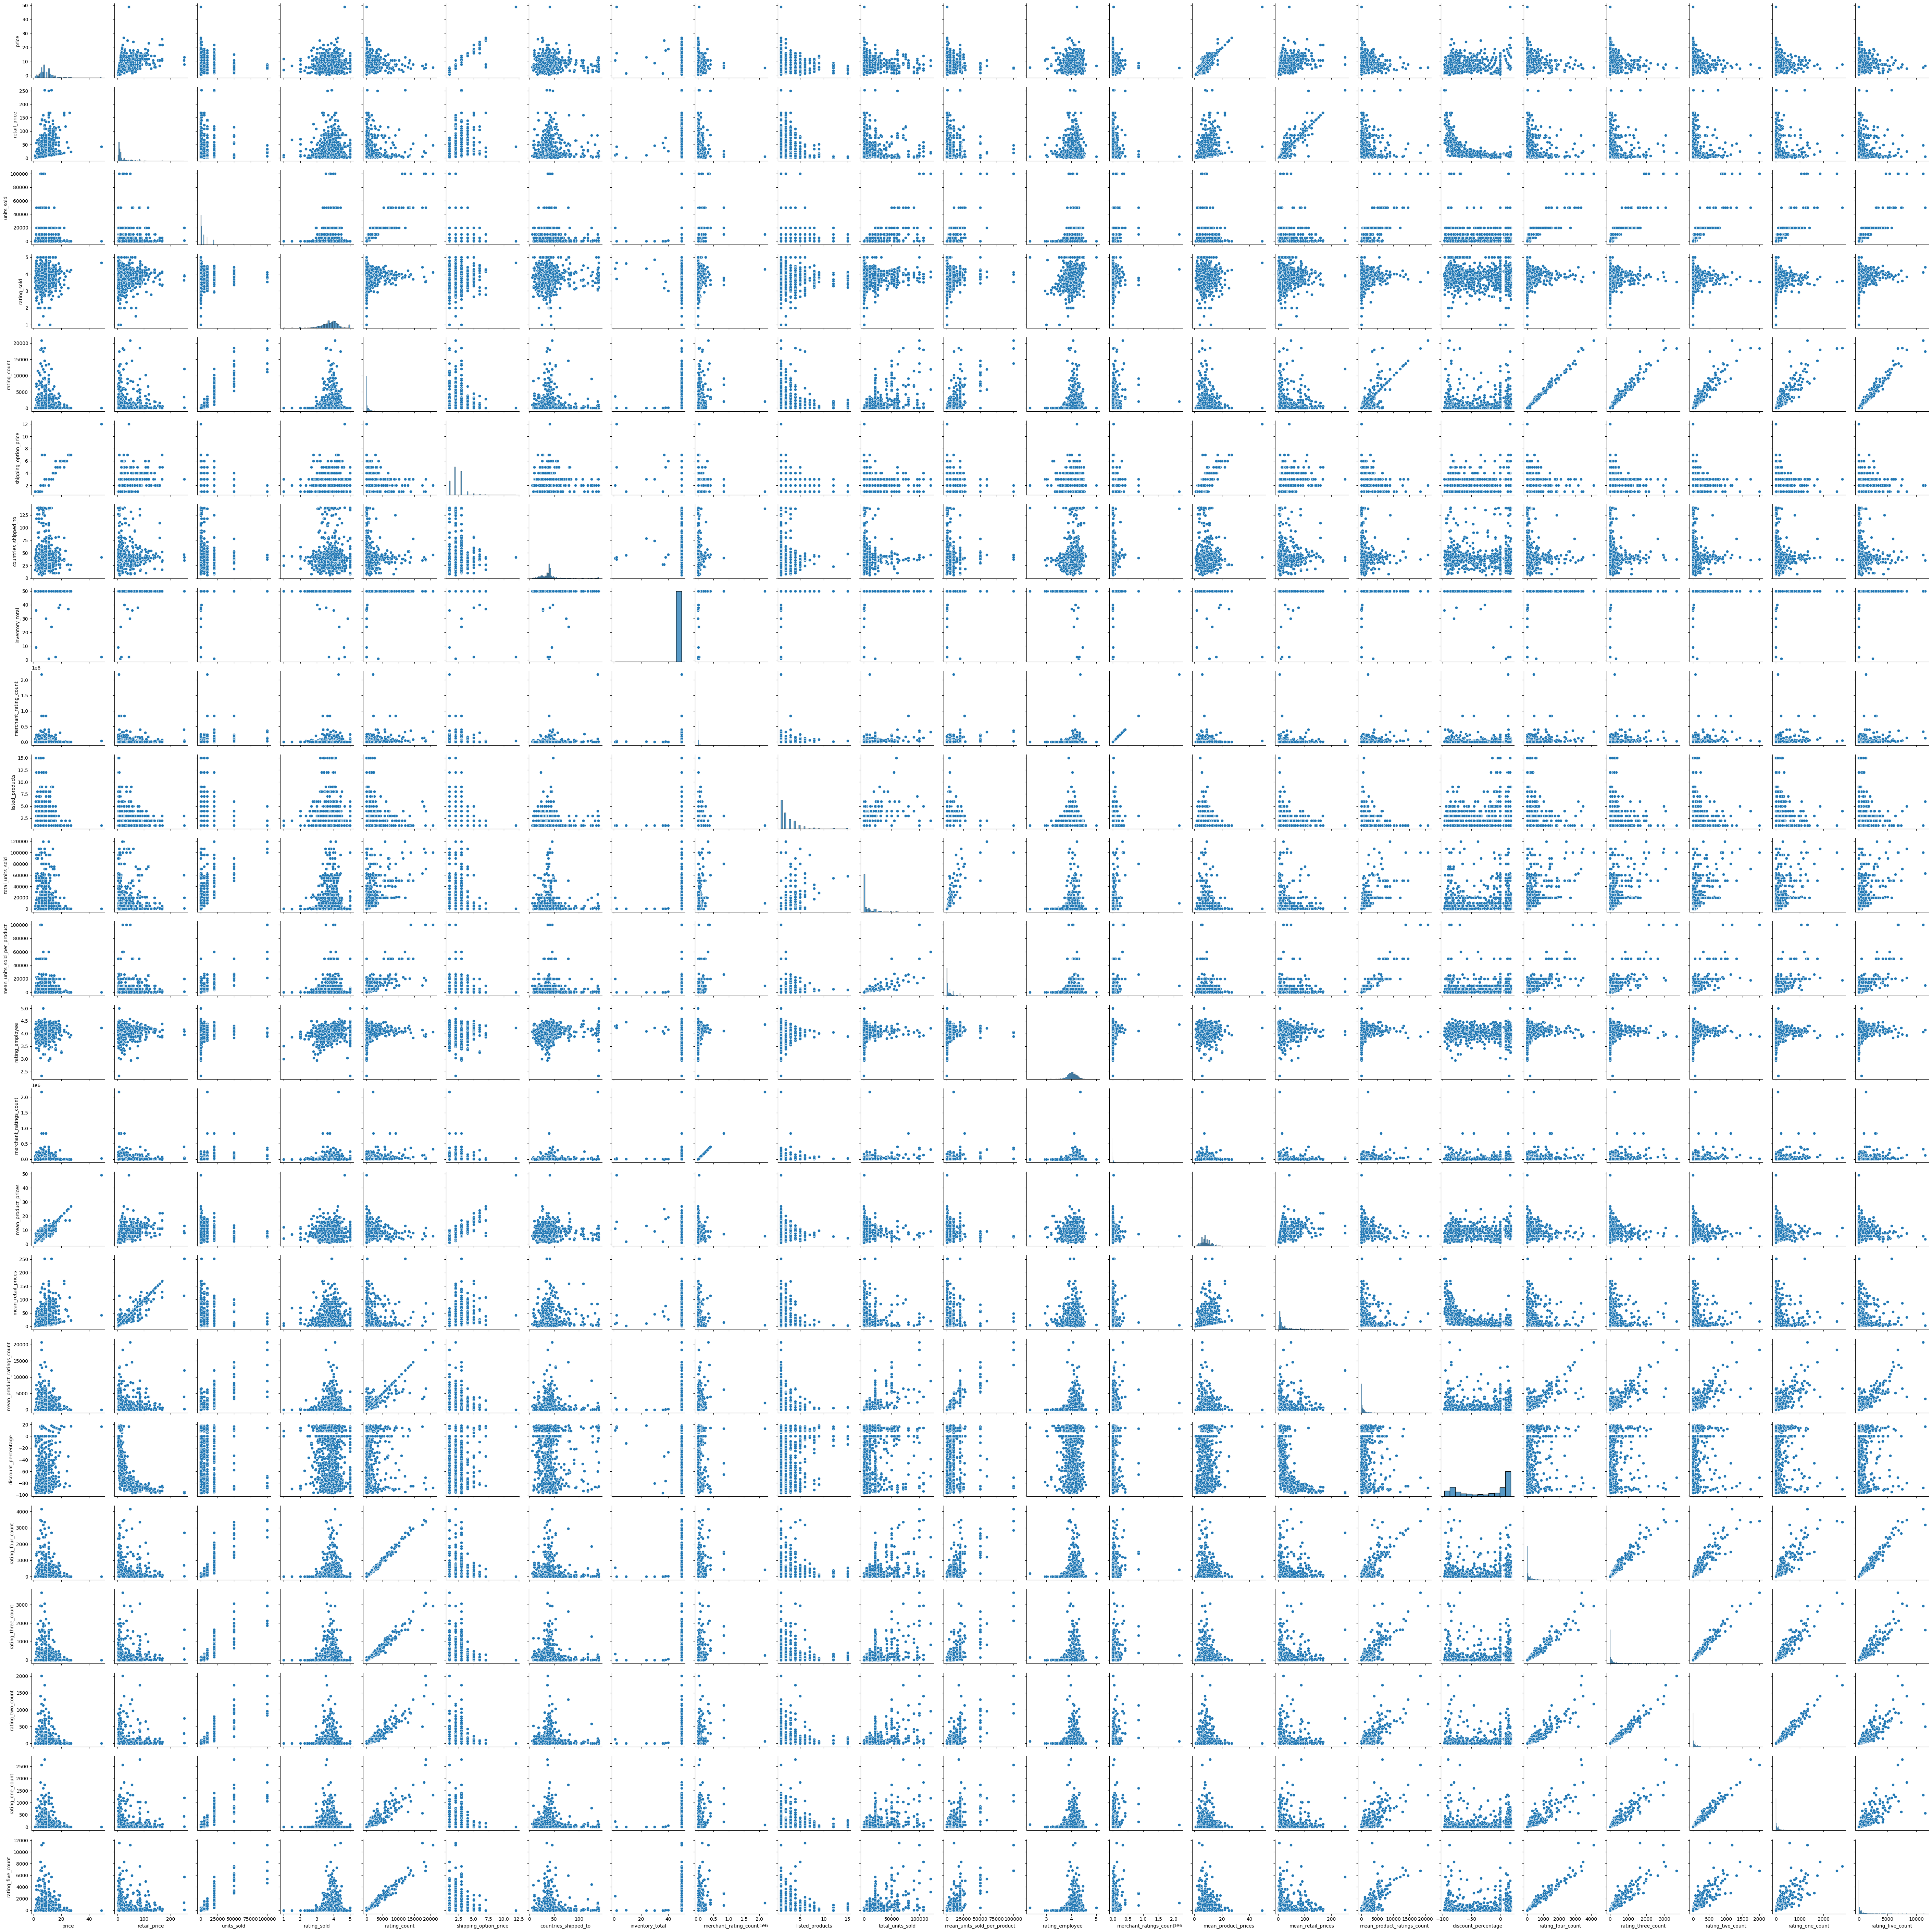

In [4]:
sns.pairplot(df)

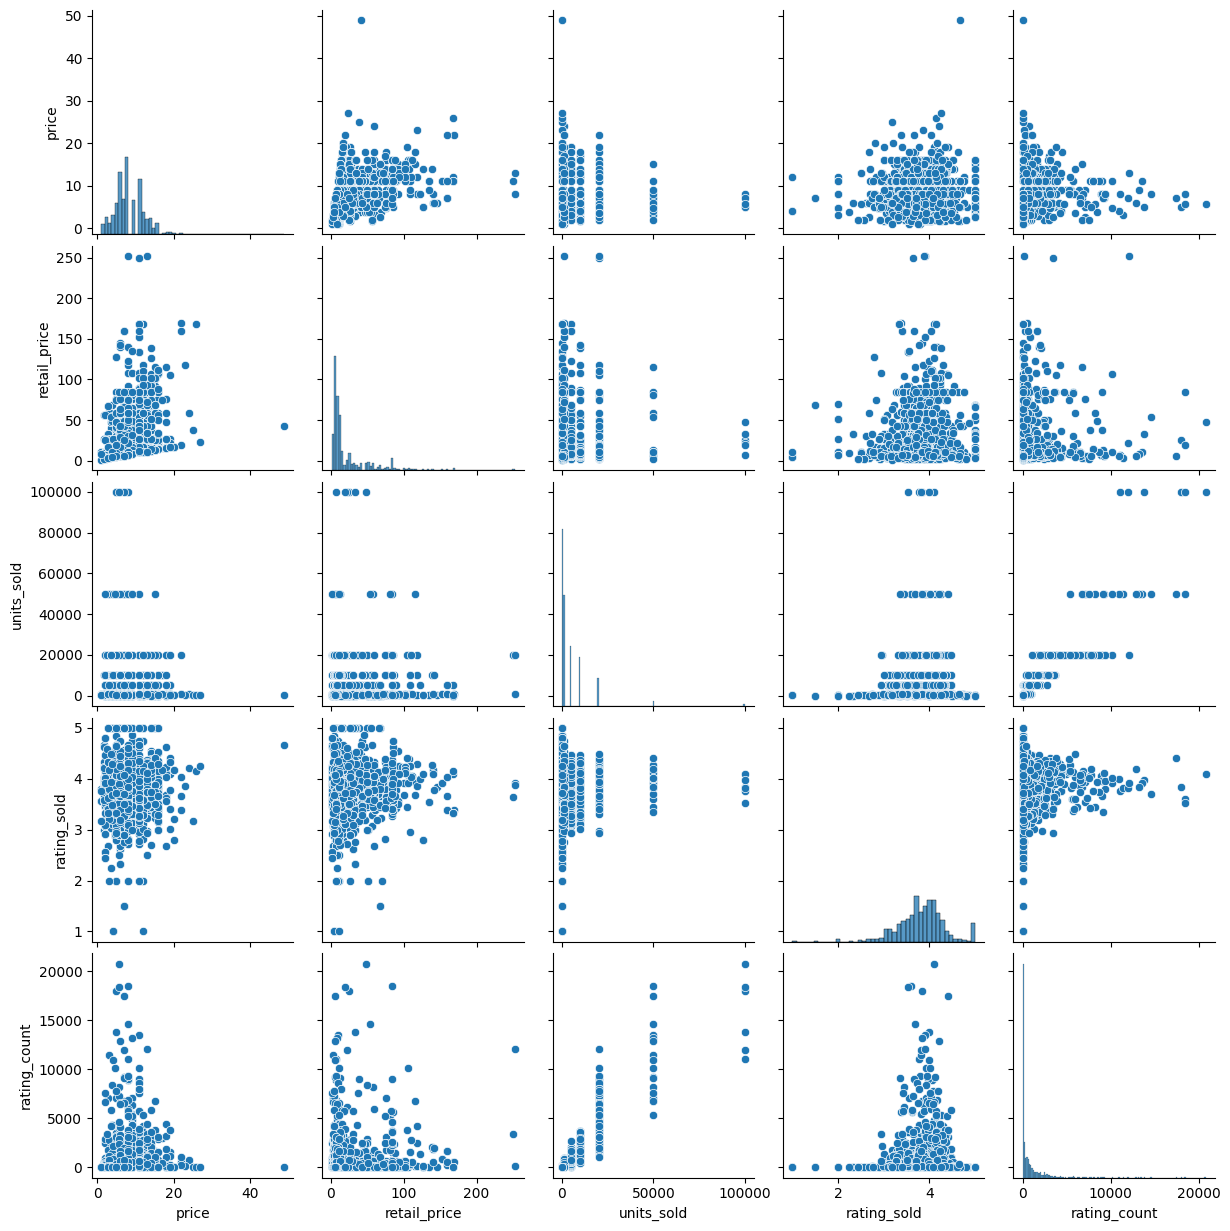

In [9]:
sns.pairplot(df[["price", "retail_price", "units_sold", "rating_sold",  "rating_count"]])

In [11]:
import numpy as np

In [12]:
# 1. La variable price representa el precio de los productos. Calcula tanto la media como la mediana de los precios y explica
# la diferencia entre ambas medidas. 
# Proporciona ejemplos de situaciones en las que la mediana podría ser preferible sobre la media.

media = np.round(df["price"].mean(), 2)
mediana = df["price"].median()

print(f"la media es {media} y la mediana es: {mediana}")

la media es 8.33 y la mediana es: 8.0


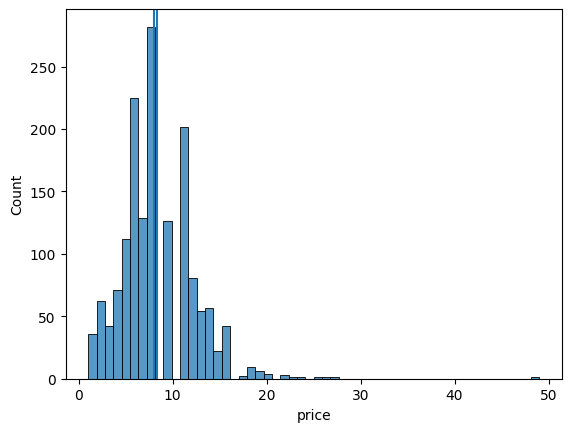

In [16]:
sns.histplot(x = "price", data = df)
plt.axvline(media)
plt.axvline(mediana)

In [18]:
# 2. Crea una tabla de correlación que muestre cómo se relacionan las variables "price", "retail_price", "units_sold", "rating_sold", y "rating_count". 
# Interpreta los resultados y discute si hay alguna correlación significativa entre estas variables.
lista =  ["price", "retail_price", "units_sold", "rating_sold",  "rating_count"]
df_lista = df[lista]

df_lista.head()

price  retail_price  units_sold  rating_sold  rating_count
0  16.00            14         100         3.76            54
1   8.00            22       20000         3.45          6135
2   4.90             8        1000         3.83            99
3   4.93             6         100         3.77            47
4   5.65            10         100         2.86             7

In [19]:
df_corr = df_lista.corr(method="spearman")

df_corr

price  retail_price  units_sold  rating_sold  rating_count
price         1.000000      0.536104    0.061769     0.055564      0.129345
retail_price  0.536104      1.000000   -0.027991     0.043173      0.024439
units_sold    0.061769     -0.027991    1.000000     0.026794      0.941988
rating_sold   0.055564      0.043173    0.026794     1.000000      0.046749
rating_count  0.129345      0.024439    0.941988     0.046749      1.000000

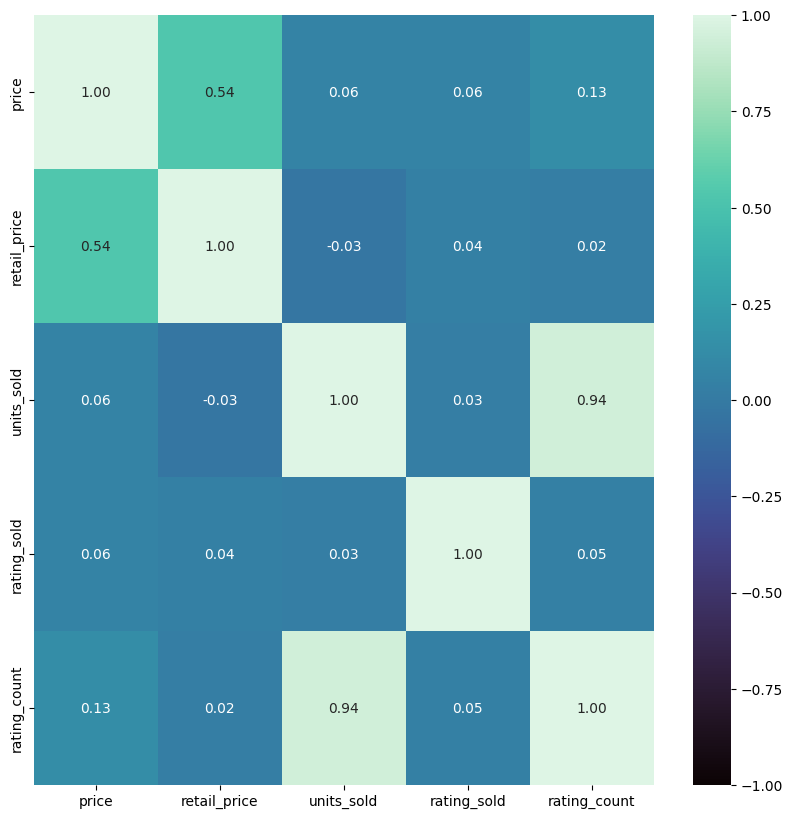

In [22]:
plt.figure(figsize = (10, 10))

# convertimos nuestra matriz de correlación a una gráfica
sns.heatmap(df_corr, # sobre que datos queremos hacer el heatmap
            annot = True, # para que nos muestre los valores de cada una de las celdas del heatmap
            fmt = ".2f",  # para que nos redondee a dos decimales
            cmap = "mako", # para establecer el color de la gráfica
            vmax = 1, # para indicar cual es el valor máximo de nuestra escala de colores
            vmin = -1);

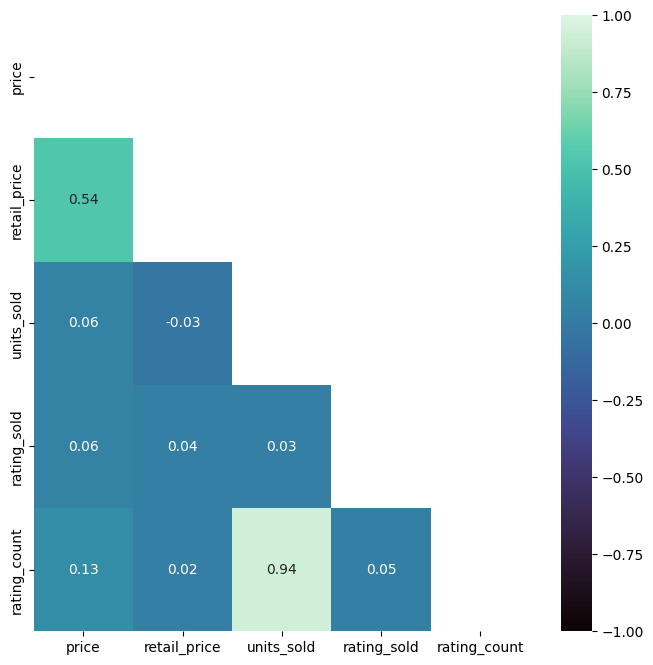

In [24]:
plt.figure(figsize = (8, 8))

# creamos una matriz booleana de máscara
mask = np.triu(np.ones_like(df_corr, dtype=bool))

# creamos un heatmap con la máscara
sns.heatmap(df_corr, 
            annot = True, 
            fmt = ".2f", 
            cmap = "mako", 
            vmax = 1, 
            vmin = -1, 
            mask = mask);

In [26]:
df_lista.head()

price  retail_price  units_sold  rating_sold  rating_count
0  16.00            14         100         3.76            54
1   8.00            22       20000         3.45          6135
2   4.90             8        1000         3.83            99
3   4.93             6         100         3.77            47
4   5.65            10         100         2.86             7

In [27]:
# 3. Utiliza una tabla de contingencia para analizar la relación entre las variables categóricas "uses_ad_boosts" y "badge_product_quality". ¿Cómo afecta la calidad del producto al uso de anuncios promocionales?
# Proporciona interpretaciones basadas en la tabla de contingencia.
pd.crosstab(df["uses_ad_boosts"], df["badge_product_quality"])

badge_product_quality  Buena  Excelente
uses_ad_boosts                         
No                       826         66
Si                       630         51

In [29]:
np.round(pd.crosstab(df["uses_ad_boosts"], df["badge_product_quality"], normalize=True)*100, 2)

badge_product_quality  Buena  Excelente
uses_ad_boosts                         
No                     52.51       4.20
Si                     40.05       3.24

In [30]:
np.round(pd.crosstab(df["uses_ad_boosts"], df["badge_product_quality"], normalize="columns")*100, 2)

badge_product_quality  Buena  Excelente
uses_ad_boosts                         
No                     56.73      56.41
Si                     43.27      43.59

In [31]:
np.round(pd.crosstab(df["uses_ad_boosts"], df["badge_product_quality"], normalize="index")*100, 2)

badge_product_quality  Buena  Excelente
uses_ad_boosts                         
No                     92.60       7.40
Si                     92.51       7.49

In [ ]:
# 5. Calcula la media y la mediana de la variable `mean_product_prices`.
# ¿Cómo se comparan estas medidas? ¿Qué puedes inferir sobre la distribución de los precios promedio de los productos?


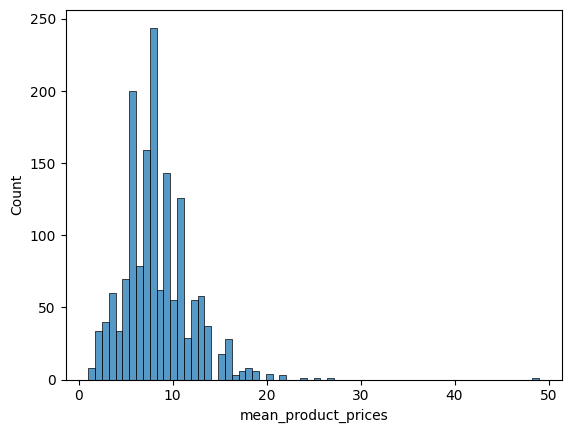

In [33]:
sns.histplot(df["mean_product_prices"]);

In [35]:
df[["mean_product_prices", "price"]].head()

mean_product_prices  price
0                16.00  16.00
1                 5.68   8.00
2                 5.68   4.90
3                 5.68   4.93
4                 5.68   5.65

In [40]:
media = df["mean_product_prices"].mean()
mediana = df["mean_product_prices"].median()

print(f"la media es {media} y la mediana es: {mediana}")

la media es 8.325600762873488 y la mediana es: 8.0


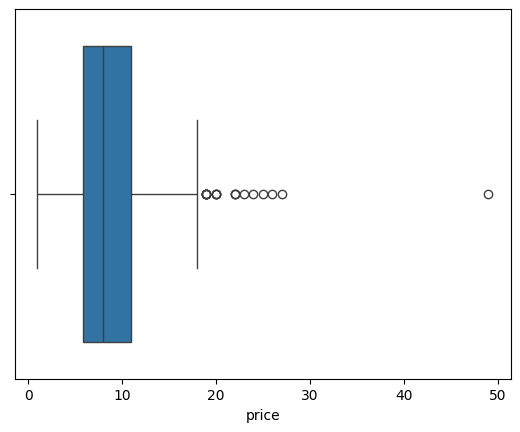

In [37]:
sns.boxplot(x = "price", data = df);

In [41]:
Q1 = np.nanpercentile(df["price"], 25)
Q3 = np.nanpercentile(df["price"], 75)

In [42]:
print(Q1, "-----------", Q3)

5.8100000000000005 ----------- 11.0


In [43]:
IQR = Q3 - Q1

IQR

np.float64(5.1899999999999995)

In [44]:
salto = IQR * 1.5

salto

np.float64(7.784999999999999)

In [51]:
bigote_derecho =Q3 + salto

In [52]:
bigote_derecho

np.float64(18.785)

In [46]:
Q1 - salto

np.float64(-1.9749999999999988)

In [ ]:
df_sin_outliers = df[df["price"] <= bigote_derecho]

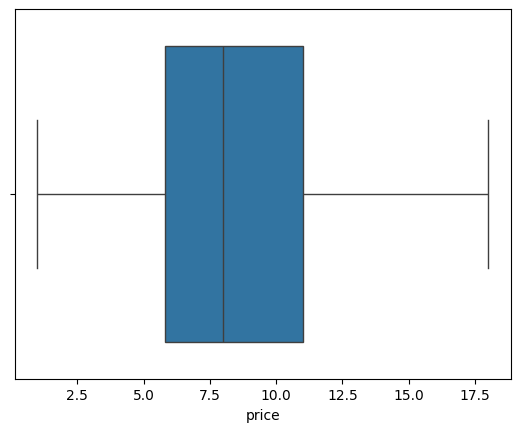

In [48]:
sns.boxplot(x = "price", data = df_sin_outliers);

<Axes: xlabel='price', ylabel='Count'>

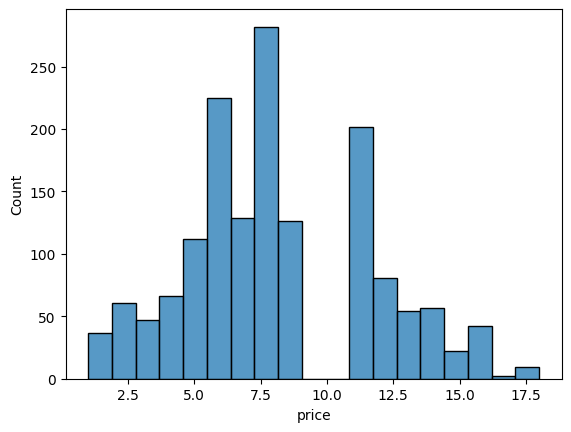

In [50]:
sns.histplot(x = "price", data = df_sin_outliers)